# plt.savefig('a.png') 로 차트를 저장할 수 있음
# -> 이미지로 웹사이트에서 차트 보여주기

In [1]:
# https://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=159

In [33]:
from bs4 import BeautifulSoup
import urllib.request as REQ
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False
# plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (8, 6)

In [3]:
kurl = 'https://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=159'
kresponse = REQ.urlopen(kurl)

In [4]:
ksoup = BeautifulSoup(kresponse, 'html5lib') # html.parser 혹은 html5lib
ksoup

<!--?xml version="1.0" encoding="utf-8" ?--><html><head></head><body><rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_06.jsp
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubdate>2020년 12월 28일 (월)요일 06:00</pubdate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>경상남,북도 육상 중기예보 - 2020년 12월 28일 (월)요일 06:00 발표</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_06.jsp
<guid>http://www.kma.go.kr/weather/forecast/mid-term_06.jsp</guid>
<description>
	<header>
		<title>경상남,북도 육상중기예보</title>
		<tm>202012280600</tm>
		<wf><!--[CDATA[○ (기온) 이번 예보기간 아침 기온은 -11~1도로 어제(27일, -3~5도)보다 낮겠고, 낮 기온은 0~8도로 어제(27일, 5~11도)보다 낮아 춥겠습니다. <br /-->          특히, 내륙을 중심으로 아침 기온이 영하 -5도 이하로 떨어지는 곳이 많겠으니, 수도관 동파 등 시설물과 건강 관리에 유의하기 바랍니다.<br/>○ (해상) 남해동부해상은 31일(목), 동해남부해상은 31일(목)~1월 1일(금)에 바람이 매우 강하게 불고, 물결이 2~4m로 매우 높게 일겠으며,<br/>          그 밖의 날은 남해동부와 동해남부 해상에서 물결이 1~3m로 일겠습니다.<br/>○ 

In [6]:
kList = []
for location in ksoup.select('location'):
    for data in location.select('data'):
        kList.append({'도시':location.city.string,
                      '날짜': data.tmef.string,
                      '날씨': data.wf.string,
                      '최저': int(data.tmn.string),
                      '최고': int(data.tmx.string)})
    
kList

[{'도시': '부산', '날짜': '2020-12-31 00:00', '날씨': '맑음', '최저': -7, '최고': 3},
 {'도시': '부산', '날짜': '2020-12-31 12:00', '날씨': '맑음', '최저': -7, '최고': 3},
 {'도시': '부산', '날짜': '2021-01-01 00:00', '날씨': '맑음', '최저': -4, '최고': 4},
 {'도시': '부산', '날짜': '2021-01-01 12:00', '날씨': '맑음', '최저': -4, '최고': 4},
 {'도시': '부산', '날짜': '2021-01-02 00:00', '날씨': '맑음', '최저': -2, '최고': 6},
 {'도시': '부산', '날짜': '2021-01-02 12:00', '날씨': '맑음', '최저': -2, '최고': 6},
 {'도시': '부산', '날짜': '2021-01-03 00:00', '날씨': '구름많음', '최저': -1, '최고': 8},
 {'도시': '부산', '날짜': '2021-01-03 12:00', '날씨': '맑음', '최저': -1, '최고': 8},
 {'도시': '부산', '날짜': '2021-01-04 00:00', '날씨': '구름많음', '최저': 1, '최고': 8},
 {'도시': '부산', '날짜': '2021-01-04 12:00', '날씨': '구름많음', '최저': 1, '최고': 8},
 {'도시': '부산', '날짜': '2021-01-05 00:00', '날씨': '구름많음', '최저': -1, '최고': 6},
 {'도시': '부산', '날짜': '2021-01-06 00:00', '날씨': '맑음', '최저': -4, '최고': 4},
 {'도시': '부산', '날짜': '2021-01-07 00:00', '날씨': '맑음', '최저': -4, '최고': 3},
 {'도시': '울산', '날짜': '2020-12-31 00:00', '날씨': '맑음', '최저': 

In [7]:
# 데이터프레임으로 만들어줌

kdf = pd.DataFrame(kList)
kdf

,도시,날짜,날씨,최저,최고
0,부산,2020-12-31 00:00,맑음,-7,3
1,부산,2020-12-31 12:00,맑음,-7,3
2,부산,2021-01-01 00:00,맑음,-4,4
3,부산,2021-01-01 12:00,맑음,-4,4
4,부산,2021-01-02 00:00,맑음,-2,6
...,...,...,...,...,...
255,하동,2021-01-04 00:00,구름많음,-3,8
256,하동,2021-01-04 12:00,구름많음,-3,8
257,하동,2021-01-05 00:00,구름많음,-3,5
258,하동,2021-01-06 00:00,맑음,-6,3


In [39]:
df = pd.DataFrame(kList)
df

,도시,날짜,날씨,최저,최고
0,부산,2020-12-31 00:00,맑음,-7,3
1,부산,2020-12-31 12:00,맑음,-7,3
2,부산,2021-01-01 00:00,맑음,-4,4
3,부산,2021-01-01 12:00,맑음,-4,4
4,부산,2021-01-02 00:00,맑음,-2,6
...,...,...,...,...,...
255,하동,2021-01-04 00:00,구름많음,-3,8
256,하동,2021-01-04 12:00,구름많음,-3,8
257,하동,2021-01-05 00:00,구름많음,-3,5
258,하동,2021-01-06 00:00,맑음,-6,3


In [11]:
# 특정 칼럼을 인덱스로 설정
# 이차원을 데이터프레임으로 바꿀 때는 index_col을 사용할 수 없고 set_index로 설정해 주기

# 멀티인덱스
# 변수로 받거나 kdf.set_index(['도시','날짜'], inplace=True)

kdf = kdf.set_index(['도시','날짜'])
kdf

날씨  최저  최고
도시 날짜                            
부산 2020-12-31 00:00    맑음  -7   3
   2020-12-31 12:00    맑음  -7   3
   2021-01-01 00:00    맑음  -4   4
   2021-01-01 12:00    맑음  -4   4
   2021-01-02 00:00    맑음  -2   6
...                   ...  ..  ..
하동 2021-01-04 00:00  구름많음  -3   8
   2021-01-04 12:00  구름많음  -3   8
   2021-01-05 00:00  구름많음  -3   5
   2021-01-06 00:00    맑음  -6   3
   2021-01-07 00:00    맑음  -6   3

[260 rows x 3 columns]

In [13]:
kdf.loc

In [ ]:
# 부산 지역의 최고 기온과 최저기온의 평균 시각화

In [19]:
busan = kdf.loc['부산'].groupby('날짜')[['최고', '최저']].mean()

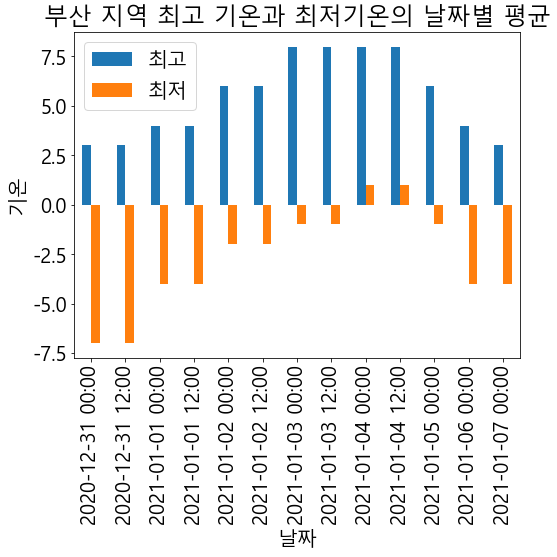

In [57]:
busan.plot(kind='bar')
plt.title('부산 지역 최고 기온과 최저기온의 날짜별 평균')  
plt.ylabel('기온')
plt.xlabel('날짜')
plt.savefig('1.png')
plt.show()

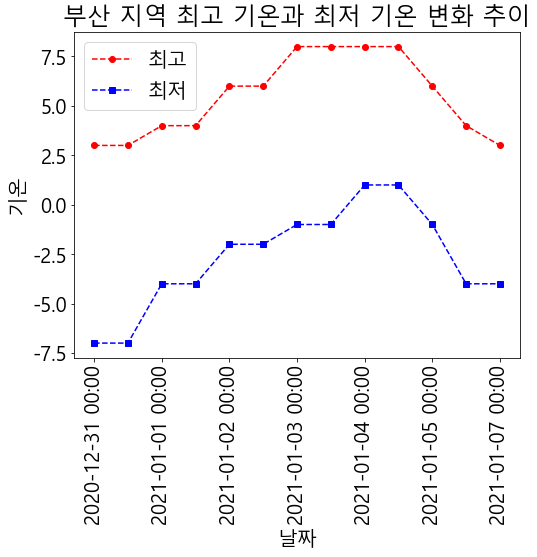

In [58]:
busan.plot(kind='line', style=['ro--', 'bs--'], rot='90')
plt.title('부산 지역 최고 기온과 최저 기온 변화 추이') 
plt.ylabel('기온')
plt.savefig('2.png')
plt.show()

In [ ]:
# 도시별 최저 기온 

In [27]:
city_low = kdf.groupby('도시')[['최저']].mean()
city_low

,최저
도시,
거제,-3.000000
거창,-8.076923
고성,-5.769231
김해,-5.153846
남해,-2.923077
밀양,-7.000000
부산,-2.692308
사천,-5.923077
산청,-5.307692


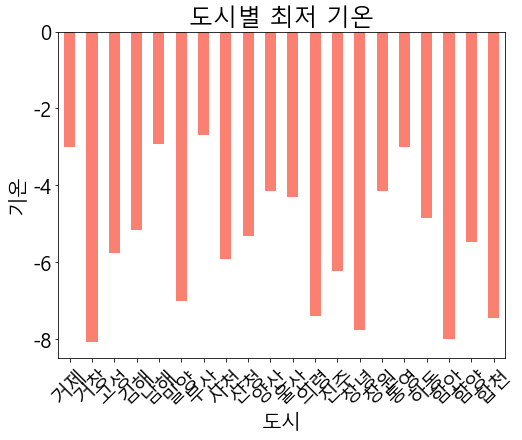

In [59]:
city_low.plot(kind='bar', rot=45, legend=False, color='salmon')
plt.title('도시별 최저 기온')  
plt.ylabel('기온')
plt.xlabel('도시')
plt.savefig('3.png')
plt.show()

In [63]:
city_high = kdf.groupby('도시')[['최고']].mean()
city_high

,최고
도시,
거제,4.538462
거창,2.461538
고성,5.307692
김해,4.153846
남해,5.000000
밀양,4.384615
부산,5.461538
사천,5.615385
산청,3.384615


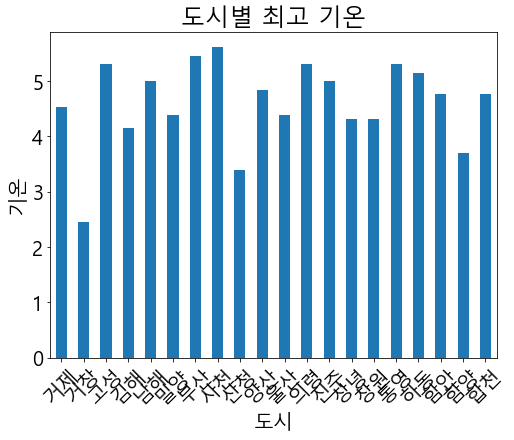

In [65]:
city_high.plot(kind='bar', rot=45, legend=False)
plt.title('도시별 최고 기온')  
plt.ylabel('기온')
plt.xlabel('도시')
plt.savefig('4.png')
plt.show()